# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
%pip install citipy
from citipy import citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    print(city)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + '&apiKey=' + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_data = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data['coord']['lat']
        city_lng = weather_data['coord']['lon']
        city_max_temp = weather_data['main']['temp_max']
        city_humidity = weather_data['main']['humidity']
        city_clouds = weather_data['clouds']['all']
        city_wind = weather_data['wind']['speed']
        city_country = weather_data['sys']['country']
        city_date = weather_data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
viedma
Processing Record 1 of Set 1 | viedma
port-aux-francais
Processing Record 2 of Set 1 | port-aux-francais
waitangi
Processing Record 3 of Set 1 | waitangi
sandnessjoen
Processing Record 4 of Set 1 | sandnessjoen
blackmans bay
Processing Record 5 of Set 1 | blackmans bay
qarazhal
Processing Record 6 of Set 1 | qarazhal
shangzhi
Processing Record 7 of Set 1 | shangzhi
yagry
Processing Record 8 of Set 1 | yagry
City not found. Skipping...
ushuaia
Processing Record 9 of Set 1 | ushuaia
kil
Processing Record 10 of Set 1 | kil
tura
Processing Record 11 of Set 1 | tura
longyearbyen
Processing Record 12 of Set 1 | longyearbyen
arraial do cabo
Processing Record 13 of Set 1 | arraial do cabo
bethel
Processing Record 14 of Set 1 | bethel
pandan
Processing Record 15 of Set 1 | pandan
changyon
Processing Record 16 of Set 1 | changyon
grytviken
Processing Record 17 of Set 1 | grytviken
malyye derbety
Processing Record 18 of Set 1 | ma

ghat
Processing Record 6 of Set 4 | ghat
college
Processing Record 7 of Set 4 | college
san juan de los morros
Processing Record 8 of Set 4 | san juan de los morros
kirensk
Processing Record 9 of Set 4 | kirensk
gaspe
Processing Record 10 of Set 4 | gaspe
akureyri
Processing Record 11 of Set 4 | akureyri
vilyuchinsk
Processing Record 12 of Set 4 | vilyuchinsk
tralee
Processing Record 13 of Set 4 | tralee
fort st. john
Processing Record 14 of Set 4 | fort st. john
punta arenas
Processing Record 15 of Set 4 | punta arenas
daru
Processing Record 16 of Set 4 | daru
broken hill
Processing Record 17 of Set 4 | broken hill
kudahuvadhoo
Processing Record 18 of Set 4 | kudahuvadhoo
hagere hiywet
Processing Record 19 of Set 4 | hagere hiywet
dubbo
Processing Record 20 of Set 4 | dubbo
papao
Processing Record 21 of Set 4 | papao
kodiak
Processing Record 22 of Set 4 | kodiak
ujae
Processing Record 23 of Set 4 | ujae
tazovsky
Processing Record 24 of Set 4 | tazovsky
rundu
Processing Record 25 of Se

kurumkan
Processing Record 8 of Set 7 | kurumkan
barranca
Processing Record 9 of Set 7 | barranca
mhamid
Processing Record 10 of Set 7 | mhamid
kapa'a
Processing Record 11 of Set 7 | kapa'a
ancud
Processing Record 12 of Set 7 | ancud
betio village
Processing Record 13 of Set 7 | betio village
homer
Processing Record 14 of Set 7 | homer
ribeira grande
Processing Record 15 of Set 7 | ribeira grande
tranovaho
Processing Record 16 of Set 7 | tranovaho
City not found. Skipping...
carnarvon
Processing Record 17 of Set 7 | carnarvon
san jose del guaviare
Processing Record 18 of Set 7 | san jose del guaviare
fort mcmurray
Processing Record 19 of Set 7 | fort mcmurray
east london
Processing Record 20 of Set 7 | east london
najran
Processing Record 21 of Set 7 | najran
igarka
Processing Record 22 of Set 7 | igarka
xinyuan
Processing Record 23 of Set 7 | xinyuan
port macquarie
Processing Record 24 of Set 7 | port macquarie
kirakira
Processing Record 25 of Set 7 | kirakira
mana
Processing Record 2

geraldton
Processing Record 12 of Set 10 | geraldton
pirae
Processing Record 13 of Set 10 | pirae
marka
Processing Record 14 of Set 10 | marka
itoman
Processing Record 15 of Set 10 | itoman
labin
Processing Record 16 of Set 10 | labin
nemuro
Processing Record 17 of Set 10 | nemuro
qalat
Processing Record 18 of Set 10 | qalat
kenora
Processing Record 19 of Set 10 | kenora
bequimao
Processing Record 20 of Set 10 | bequimao
palmer
Processing Record 21 of Set 10 | palmer
houghton
Processing Record 22 of Set 10 | houghton
cidreira
Processing Record 23 of Set 10 | cidreira
payson
Processing Record 24 of Set 10 | payson
mangrol
Processing Record 25 of Set 10 | mangrol
hamilton
Processing Record 26 of Set 10 | hamilton
kapuskasing
Processing Record 27 of Set 10 | kapuskasing
bopolu
Processing Record 28 of Set 10 | bopolu
bardai
Processing Record 29 of Set 10 | bardai
saint-joseph
Processing Record 30 of Set 10 | saint-joseph
morant bay
Processing Record 31 of Set 10 | morant bay
iquique
Proces

el dorado
Processing Record 12 of Set 13 | el dorado
ishigaki
Processing Record 13 of Set 13 | ishigaki
choctaw
Processing Record 14 of Set 13 | choctaw
kiffa
Processing Record 15 of Set 13 | kiffa
sayansk
Processing Record 16 of Set 13 | sayansk
ternate
Processing Record 17 of Set 13 | ternate
weiser
Processing Record 18 of Set 13 | weiser
chake chake
Processing Record 19 of Set 13 | chake chake
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
print(city_data)

[{'City': 'viedma', 'Lat': -40.8135, 'Lng': -62.9967, 'Max Temp': 281.69, 'Humidity': 34, 'Cloudiness': 6, 'Wind Speed': 3.57, 'Country': 'AR', 'Date': 1685316192}, {'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 279.59, 'Humidity': 98, 'Cloudiness': 99, 'Wind Speed': 6.41, 'Country': 'TF', 'Date': 1685316241}, {'City': 'waitangi', 'Lat': -43.9535, 'Lng': -176.5597, 'Max Temp': 288.05, 'Humidity': 82, 'Cloudiness': 52, 'Wind Speed': 3.13, 'Country': 'NZ', 'Date': 1685316241}, {'City': 'sandnessjoen', 'Lat': 66.0217, 'Lng': 12.6316, 'Max Temp': 277.95, 'Humidity': 85, 'Cloudiness': 100, 'Wind Speed': 4.47, 'Country': 'NO', 'Date': 1685316241}, {'City': 'blackmans bay', 'Lat': -43.0167, 'Lng': 147.3167, 'Max Temp': 282.22, 'Humidity': 69, 'Cloudiness': 94, 'Wind Speed': 6.74, 'Country': 'AU', 'Date': 1685316242}, {'City': 'qarazhal', 'Lat': 48.0078, 'Lng': 70.7903, 'Max Temp': 286.14, 'Humidity': 32, 'Cloudiness': 43, 'Wind Speed': 3.85, 'Country': 'KZ', 'Date': 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,viedma,-40.8135,-62.9967,281.69,34,6,3.57,AR,1685316192
1,port-aux-francais,-49.3500,70.2167,279.59,98,99,6.41,TF,1685316241
2,waitangi,-43.9535,-176.5597,288.05,82,52,3.13,NZ,1685316241
3,sandnessjoen,66.0217,12.6316,277.95,85,100,4.47,NO,1685316241
4,blackmans bay,-43.0167,147.3167,282.22,69,94,6.74,AU,1685316242


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,viedma,-40.8135,-62.9967,281.69,34,6,3.57,AR,1685316192
1,port-aux-francais,-49.3500,70.2167,279.59,98,99,6.41,TF,1685316241
2,waitangi,-43.9535,-176.5597,288.05,82,52,3.13,NZ,1685316241
3,sandnessjoen,66.0217,12.6316,277.95,85,100,4.47,NO,1685316241
4,blackmans bay,-43.0167,147.3167,282.22,69,94,6.74,AU,1685316242


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

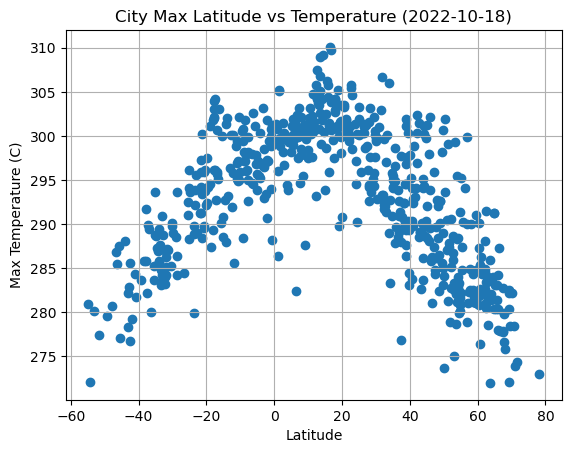

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

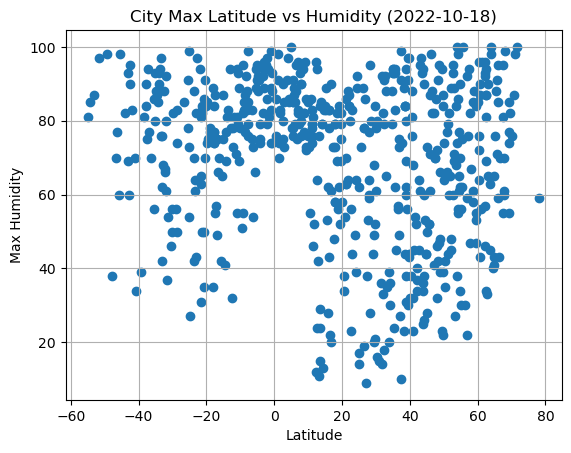

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

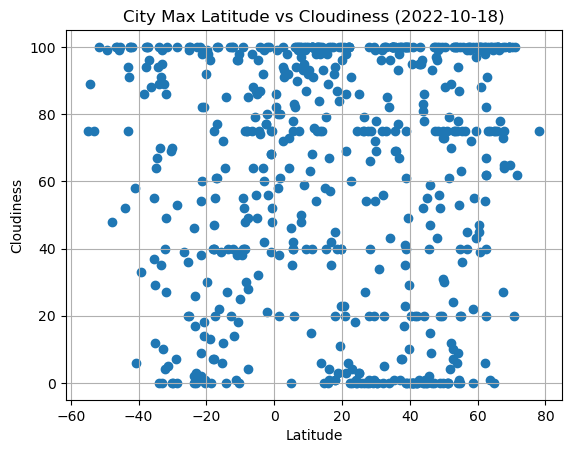

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

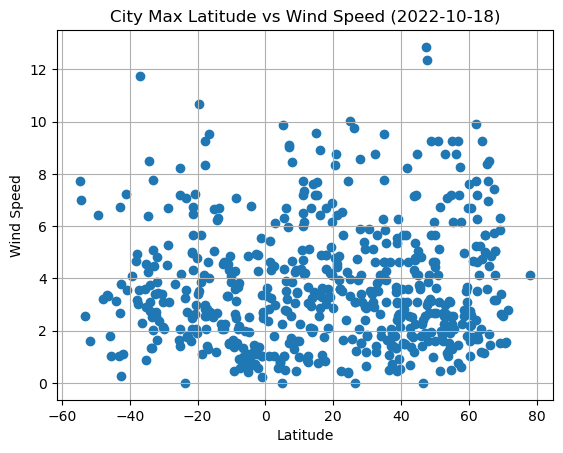

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots 
def plot_linear_regression(x,y,title,xlabel,ylabel,coord):
    slope, intercept, r, p, std_err = linregress(x, y)
    line = slope * x + intercept
    line_txt = f'y = {round(slope,2)}x + {round(intercept,2)}'
    plt.scatter(x, y)
    plt.plot(x, line, c='red')
    plt.annotate(line_txt, coord, c='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

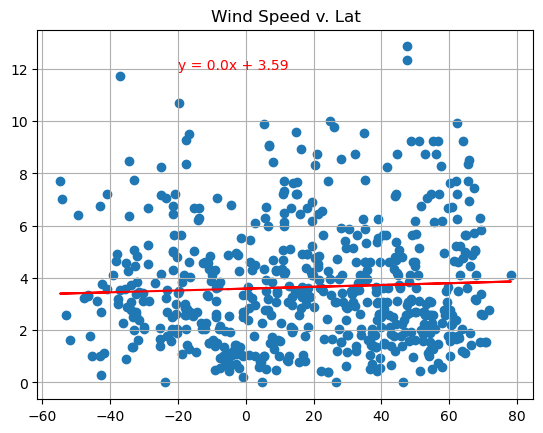

In [14]:
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plot_linear_regression(x, y, 'Wind Speed v. Lat', '', '', (-20, 12))

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,sandnessjoen,66.0217,12.6316,277.95,85,100,4.47,NO,1685316241
5,qarazhal,48.0078,70.7903,286.14,32,43,3.85,KZ,1685316242
6,shangzhi,45.2167,127.9667,288.39,50,1,3.73,CN,1685316243
8,kil,59.5072,13.3140,281.09,53,75,3.09,SE,1685316244
9,tura,25.5198,90.2201,295.89,73,0,1.67,IN,1685316244


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,viedma,-40.8135,-62.9967,281.69,34,6,3.57,AR,1685316192
1,port-aux-francais,-49.3500,70.2167,279.59,98,99,6.41,TF,1685316241
2,waitangi,-43.9535,-176.5597,288.05,82,52,3.13,NZ,1685316241
4,blackmans bay,-43.0167,147.3167,282.22,69,94,6.74,AU,1685316242
7,ushuaia,-54.8000,-68.3000,280.96,81,75,7.72,AR,1685316244


###  Temperature vs. Latitude Linear Regression Plot

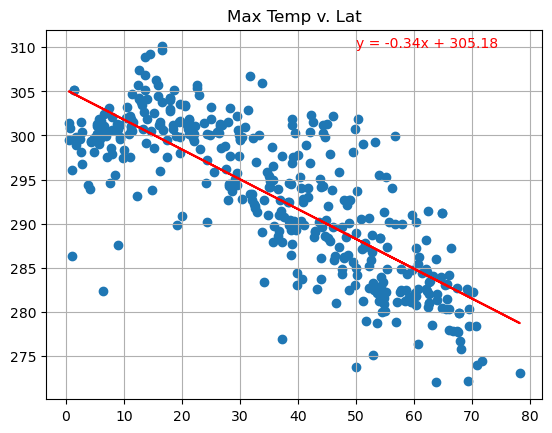

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp v. Lat', '', '', (50, 310))

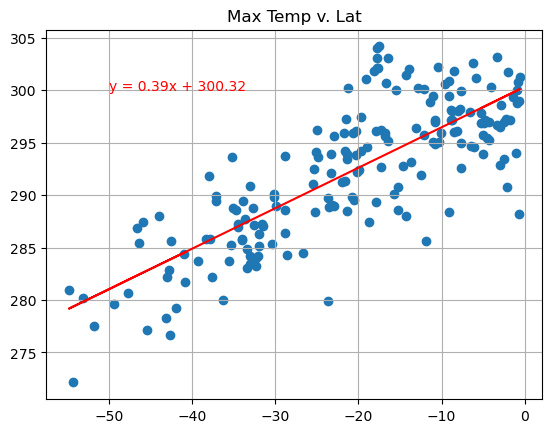

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp v. Lat', '', '', (-50, 300))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

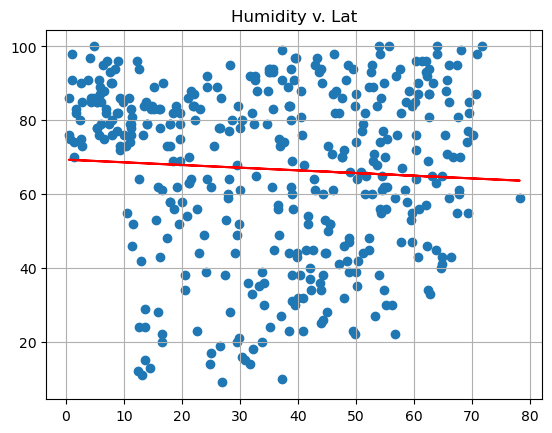

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity v. Lat', '', '', (-50, 300))

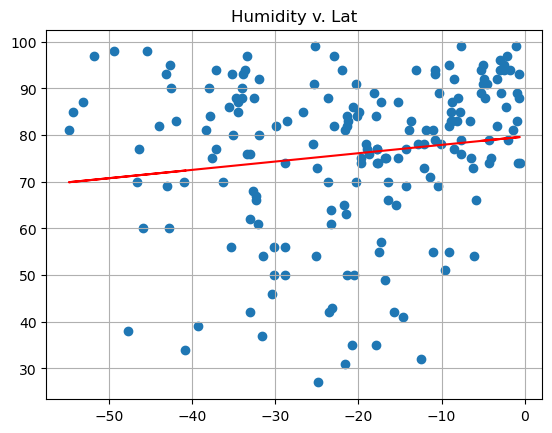

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity v. Lat', '', '', (-50, 300))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

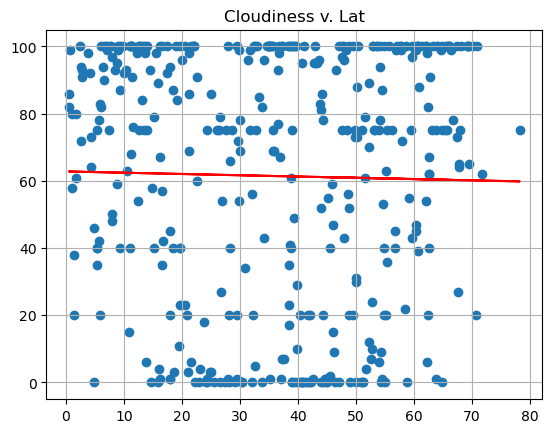

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness v. Lat', '', '', (-50, 300))

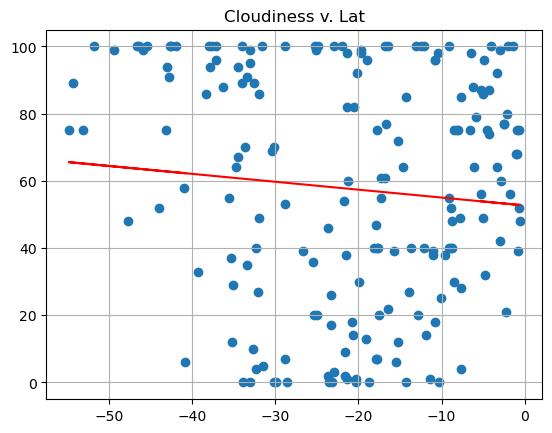

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness v. Lat', '', '', (-50, 300))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

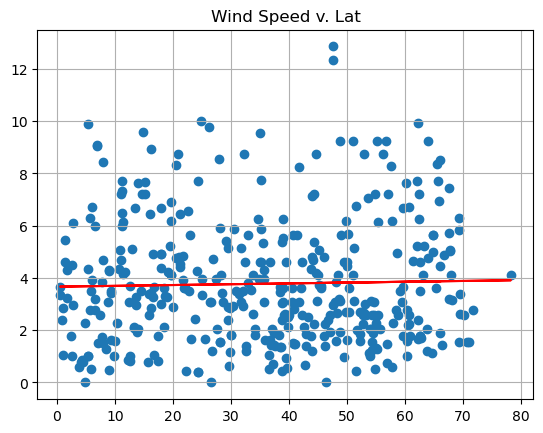

In [27]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed v. Lat', '', '', (-50, 300))

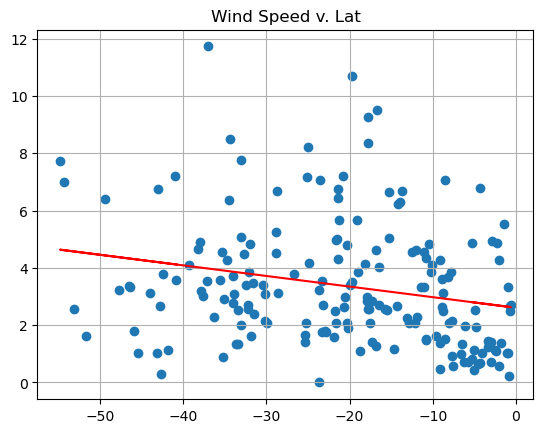

In [28]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed v. Lat', '', '', (-50, 300))

**Discussion about the linear relationship:** YOUR RESPONSE HERE